In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from pathlib import Path
import pandas as pd
from skimage import measure

In [35]:
dic_path = Path(
    r"C:\Users\cgusb\Research\mhe-analysis\data\DIC_Etz_0800_0000.plt")
# with open(dic_path, 'r') as f:
#     dic = f.readlines()
# dic
df = pd.read_csv(dic_path, delimiter=' ', header=None)
# Remove all ',' characters
df[1] = df[1].str.replace(',', '')
df[1] = df[1].astype(float)
df = df.drop(columns=0)
df = df.dropna().reset_index(drop=True)
df = df.rename(columns={1:'x', 2:'y', 3:'z'})
df.head()
# df[1]

,x,y,z
0,915.951405,1604.166667,0.079314
1,960.722084,1604.166667,-0.123323
2,1005.266994,1604.166667,-0.270351
3,1049.518422,1604.166667,-0.091159
4,1093.401244,1604.166667,0.043436


In [40]:
df['x'].loc[1]

960.7220843140183

In [43]:
rs_df = df.copy()
rs_df['x'] = (df['x'] - df['x'].min())
rs_df['x'] = rs_df['x'] / rs_df['x'].loc[1]
rs_df['y'] = df['y'] - df['y'].min()
rs_df[:14]

,x,y,z
0,0.000000,0.000000,0.079314
1,1.000000,0.000000,-0.123323
2,1.994957,0.000000,-0.270351
3,2.983359,0.000000,-0.091159
4,3.963528,0.000000,0.043436
5,4.933568,0.000000,0.064904
6,5.891304,0.000000,0.084273
7,6.834194,0.000000,0.230669
8,7.759232,0.000000,0.075180
9,8.662802,0.000000,-0.006713


In [79]:
width = 12
height = 12
thresh = -0.2
img = np.zeros((height, width))
i = 0
for x in range(width):
    for y in range(height):
        img[y, x] = df['z'].loc[i]
        i += 1

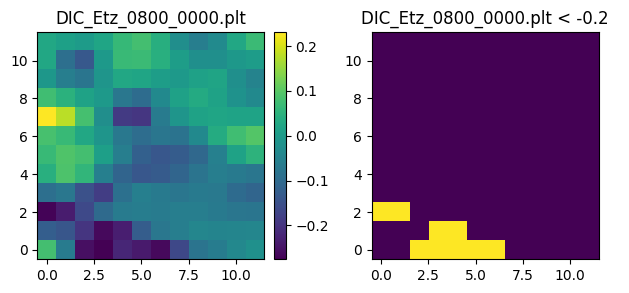

In [102]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axes = plt.subplots(1, 2, tight_layout=True)
ax = axes.ravel()
# pos = ax.imshow(img)
pos = ax[0].imshow(img, origin='lower')
ax[0].set_title(dic_path.name)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
# fig.colorbar(pos, ax=ax[0])
fig.colorbar(pos, cax=cax)
ax[1].imshow(img < thresh, origin='lower')
ax[1].set_title(f'{dic_path.name} < {thresh}')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cax.set_axis_off()